## Tasca M8 T01

### Exercicis d'algoritmes d'Agrupació.

### - Exercici 1
### Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [331]:
df = pd.read_csv('Publicaciones_Facebook_Thailandia.csv')
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


### Description:

#### 1. status_id: Numero de identificador único para cada publicación.
#### 2. status_type: Tipo de publicación realizada. (texto, foto, video, etc)
#### 3. status_published: Fecha y hora de la publicación.
#### 4. num_reactions: Número total de reacciones que ha recibido la publicación. (me gusta, me encanta, me divierte, etc)
#### 5. num_comments: Número total de comentarios realizados en la publicación.
#### 6. num_shares: Número total de veces que se ha compartido la publicación.
#### 7. num_likes: Número total de "me gusta".
#### 8. num_loves: Número total de "me encanta".
#### 9. num_wows: Número total de "me divierte".
#### 10. num_hahas: Número total de "me asombra".
#### 11. num_sads: Número total de "me entristece".
#### 12. num_angrys: Número total de "me enfada".

### Limpieza y analisis exploratorio 

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [333]:
drop_nan = ['Column1','Column2', 'Column3', 'Column4']
df = df.drop(columns=drop_nan)
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


#### Primeramente eliminamos las columnas que contienen datos nulos.

In [334]:
df.isna().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

#### Sumamos los valores nulos para verificar que no haya ninguno.

In [335]:
df.duplicated().sum()

51

In [336]:
df = df.drop_duplicates()

In [337]:
df.duplicated().sum()

0

#### Verificamos la existencia de valores duplicados y procedemos a eliminarlos.

In [338]:
df['user_id'] = df['status_id'].str.split('_').str[0]

# Verificar la repetición de los primeros valores
user_id_repetidos = df['user_id'].duplicated()

print(df.loc[user_id_repetidos, 'user_id'].unique())


['246675545449582' '134115277150304' '146481362756646' '117059915488335'
 '848451358648417' '725980084255106' '614855718638584' '819700534875473'
 '1050855161656896']


/var/folders/qn/t_d0_whn09sdmbx1px99544c0000gn/T/ipykernel_1384/428890183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_id'] = df['status_id'].str.split('_').str[0]


#### Procedemos a separar los strings de la primer columna del dataset, en donde luego de identificar los duplicados podemos ver que existen 9 diferentes, lo cual nos indica que la primer parte del string previo al "_"corresponde al numero de usuario y la segunda parte del string corresponde posiblemente al numero de publicación.

In [339]:
df[['user_id', 'publication_id']] = df['status_id'].str.split('_', expand=True)
df.drop(['status_id'], axis=1, inplace=True)
df.head()

/var/folders/qn/t_d0_whn09sdmbx1px99544c0000gn/T/ipykernel_1384/2821602529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['user_id', 'publication_id']] = df['status_id'].str.split('_', expand=True)
/var/folders/qn/t_d0_whn09sdmbx1px99544c0000gn/T/ipykernel_1384/2821602529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['user_id', 'publication_id']] = df['status_id'].str.split('_', expand=True)
/var/folders/qn/t_d0_whn09sdmbx1px99544c0000gn/T/ipykernel_1384/2821602529.py:2: SettingWithCopyWa

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,user_id,publication_id
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,246675545449582,1649696485147474
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,246675545449582,1649426988507757
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,246675545449582,1648730588577397
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,246675545449582,1648576705259452
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,246675545449582,1645700502213739


In [340]:
df = df.reindex(columns=['user_id','publication_id', 'status_type','num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys'])
df.head(10)

,user_id,publication_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582,1649696485147474,video,529,512,262,432,92,3,1,1,0
1,246675545449582,1649426988507757,photo,150,0,0,150,0,0,0,0,0
2,246675545449582,1648730588577397,video,227,236,57,204,21,1,1,0,0
3,246675545449582,1648576705259452,photo,111,0,0,111,0,0,0,0,0
4,246675545449582,1645700502213739,photo,213,0,0,204,9,0,0,0,0
5,246675545449582,1645650162218773,photo,217,6,0,211,5,1,0,0,0
6,246675545449582,1645564175560705,video,503,614,72,418,70,10,2,0,3
7,246675545449582,1644824665634656,video,295,453,53,260,32,1,1,0,1
8,246675545449582,1644655795651543,photo,203,1,0,198,5,0,0,0,0
9,246675545449582,1638788379571618,photo,170,9,1,167,3,0,0,0,0


In [341]:
df['user_id'].value_counts()

246675545449582     2635
614855718638584     1440
134115277150304     1212
1050855161656896     778
848451358648417      450
725980084255106      252
146481362756646      125
117059915488335       56
819700534875473       51
Name: user_id, dtype: int64

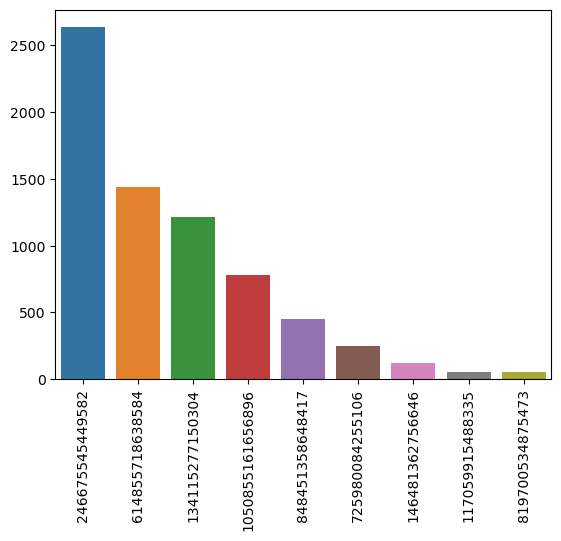

In [342]:
value_counts = df['user_id'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.xticks(rotation=90)
plt.show()

#### Luego de aplicar un conteo de los valores en la columna "user_id" realizamos un pequeño grafico de barras para tener una noción de la cantidad de publicaciones realizada por cada usuario.

In [343]:
df['status_type'].value_counts()

photo     4244
video     2333
status     359
link        63
Name: status_type, dtype: int64

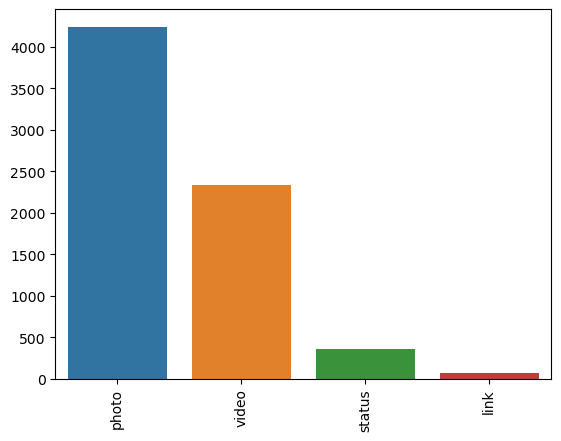

In [344]:
value_counts = df['status_type'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.xticks(rotation=90)
plt.show()

#### Al igual que anteriormente con "user_id" aplicamos un conteo de valores para la columna "status_type" de esta manera podemos ver que existen cuatro diferentes tipos (fotos, videos, status y link) en donde luego de realizar un grafico de barras para comparar las cantidades podemos llegar a la conclusion que esta es una columna de tipo categorica a la cual se tendra que aplicar un proceso de estandarizacion diferente a las numericas.

In [345]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,6999.0,224.994571,452.880746,0.0,17.0,58.0,216.0,4710.0
num_comments,6999.0,225.552079,892.743010,0.0,0.0,4.0,22.0,20990.0
num_shares,6999.0,40.258608,132.046903,0.0,0.0,0.0,4.0,3424.0
num_likes,6999.0,209.946707,439.550330,0.0,17.0,57.0,182.0,4710.0
num_loves,6999.0,12.751536,40.106872,0.0,0.0,0.0,3.0,657.0
num_wows,6999.0,1.252893,8.725551,0.0,0.0,0.0,0.0,278.0
num_hahas,6999.0,0.697957,3.970912,0.0,0.0,0.0,0.0,157.0
num_sads,6999.0,0.232605,1.481105,0.0,0.0,0.0,0.0,51.0
num_angrys,6999.0,0.110159,0.688582,0.0,0.0,0.0,0.0,31.0


#### Una visualizacion rapida de las principales columnas con datos numericos mediante el metodo describe()

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         6999 non-null   object
 1   publication_id  6999 non-null   object
 2   status_type     6999 non-null   object
 3   num_reactions   6999 non-null   int64 
 4   num_comments    6999 non-null   int64 
 5   num_shares      6999 non-null   int64 
 6   num_likes       6999 non-null   int64 
 7   num_loves       6999 non-null   int64 
 8   num_wows        6999 non-null   int64 
 9   num_hahas       6999 non-null   int64 
 10  num_sads        6999 non-null   int64 
 11  num_angrys      6999 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 710.8+ KB


#### Mediante el metodo info() corroboramos que las primeras tres columnas son de tipo objeto lo cual tendra que ser tomado en cuenta mas adelante a la hora de trabajar con estos datos.

Text(0.5, 1.0, 'Boxplot')

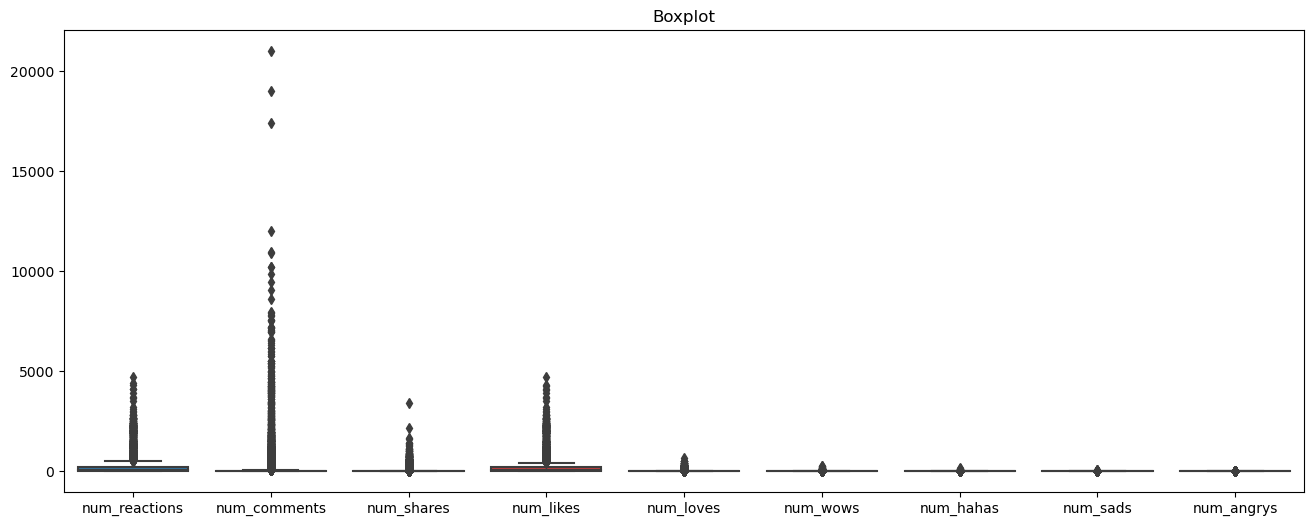

In [347]:
fig = plt.figure(figsize=(16,6))
sns.boxplot(df)
plt.title('Boxplot')

#### Luego de realizar un BoxPlot de todas las variables numericas podemos ver que en todas existen Outliers, lo cual es importante para saber que se aplicara RobustScaler a la hora de normalizar y estandarizar los datos.

/var/folders/qn/t_d0_whn09sdmbx1px99544c0000gn/T/ipykernel_1384/3010623801.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = df.corr()


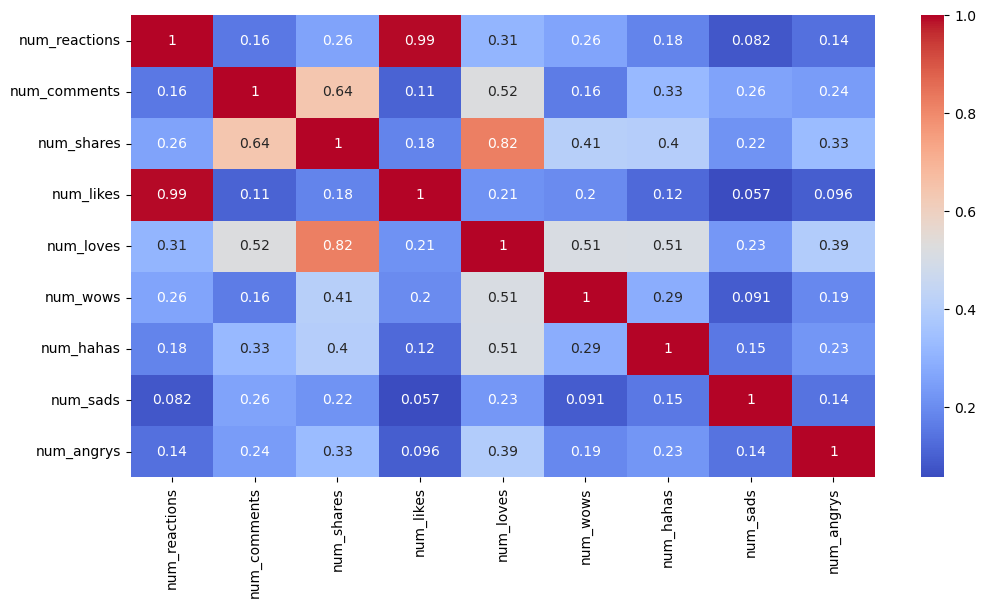

In [348]:
correlacion = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(correlacion, cmap='coolwarm', annot=True)
plt.show()

#### Por ultimo en cuanto al analisis exploratorio de nuestros datos realizamos una tabla de correlación entre nuesteas variables, en donde principalmente encontramos: 

#### Una fuerte correlación positiva entre el numero de reacciones y el numero de likes.
#### Una fuerte correlación positiva entre el numero de me encanta y el numero de compartidos.
#### Una correlacion alta entre el numero de compartidos y el numero de comentarios.
#### Ademas se ven correlaciones medias entre numero de me encanta y numero de comentarios, asi como tambien entre me divierte y me encanta.

### Preprocesado

In [349]:
df_dummies= pd.get_dummies(df["status_type"], prefix="status_type")
df_dummies

,status_type_link,status_type_photo,status_type_status,status_type_video
0,0,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
7045,0,1,0,0
7046,0,1,0,0
7047,0,1,0,0
7048,0,1,0,0


In [350]:
drop_non_numeric = ['user_id','publication_id', 'status_type']
df = df.drop(columns=drop_non_numeric)

#### Como habiamos comentado anteriormente la variable status_type es de tipo catagorica, por lo que aplicamos get_dummies para separarla en cuatro variables (status_type_link, status_type_photo, status_type_status y status_type_video), posteriormente se procede a eliminar la columna status_type ademas de las columnas user_id y publication_id ya que estos datos podrian alterar los resultados y para nuestro caso de estudio no son relevantes. 

In [351]:
df = pd.concat([df.reset_index(drop=True), df_dummies.reset_index(drop=True)], axis=1)
df

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,529,512,262,432,92,3,1,1,0,0,0,0,1
1,150,0,0,150,0,0,0,0,0,0,1,0,0
2,227,236,57,204,21,1,1,0,0,0,0,0,1
3,111,0,0,111,0,0,0,0,0,0,1,0,0
4,213,0,0,204,9,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,89,0,0,89,0,0,0,0,0,0,1,0,0
6995,16,0,0,14,1,0,1,0,0,0,1,0,0
6996,2,0,0,1,1,0,0,0,0,0,1,0,0
6997,351,12,22,349,2,0,0,0,0,0,1,0,0


In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   num_reactions       6999 non-null   int64
 1   num_comments        6999 non-null   int64
 2   num_shares          6999 non-null   int64
 3   num_likes           6999 non-null   int64
 4   num_loves           6999 non-null   int64
 5   num_wows            6999 non-null   int64
 6   num_hahas           6999 non-null   int64
 7   num_sads            6999 non-null   int64
 8   num_angrys          6999 non-null   int64
 9   status_type_link    6999 non-null   uint8
 10  status_type_photo   6999 non-null   uint8
 11  status_type_status  6999 non-null   uint8
 12  status_type_video   6999 non-null   uint8
dtypes: int64(9), uint8(4)
memory usage: 519.6 KB


#### Una vez concatenadas las nuevas columnas dummies con el df original procedemos a ver el tipo de dato por columna mediante el metodo info() en donde podemos ver que todos son valores numericos enteros y unitarios para las dummies.

In [353]:
from scipy.stats import shapiro

for i in df:
    stat, p = shapiro(df[i])
    print('nombre de la variable', i)
    print('stat=%.3f, p=%.3f' % (stat, p))
    
    if p > 0.05:
        print('distribucion gaussiana', "\n")
    else:
        print('distribucion NO gaussiana', "\n")

nombre de la variable num_reactions
stat=0.508, p=0.000
distribucion NO gaussiana 

nombre de la variable num_comments
stat=0.262, p=0.000
distribucion NO gaussiana 

nombre de la variable num_shares
stat=0.338, p=0.000
distribucion NO gaussiana 

nombre de la variable num_likes
stat=0.487, p=0.000
distribucion NO gaussiana 

nombre de la variable num_loves
stat=0.353, p=0.000
distribucion NO gaussiana 

nombre de la variable num_wows
stat=0.106, p=0.000
distribucion NO gaussiana 

nombre de la variable num_hahas
stat=0.148, p=0.000
distribucion NO gaussiana 

nombre de la variable num_sads
stat=0.136, p=0.000
distribucion NO gaussiana 

nombre de la variable num_angrys
stat=0.141, p=0.000
distribucion NO gaussiana 

nombre de la variable status_type_link
stat=0.066, p=0.000
distribucion NO gaussiana 

nombre de la variable status_type_photo
stat=0.620, p=0.000
distribucion NO gaussiana 

nombre de la variable status_type_status
stat=0.228, p=0.000
distribucion NO gaussiana 

nombre de

/Users/Moraes/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### Continuando con el preprocesado, utilizamos el test de Shapiro Wilk para saber si nuestras variables numericas siguen una distribución Gaussiana, lo que en este caso nos indica que todas nuestras variables no son gaussianas.

In [354]:
from sklearn.preprocessing import RobustScaler


outliers_variables = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
dummy_variables = ['status_type_link', 'status_type_photo', 'status_type_status', 'status_type_video']

scaling_robust = RobustScaler()

df_robust = scaling_robust.fit_transform(df[outliers_variables])

df_robust_scaler = pd.DataFrame(df_robust, columns=outliers_variables)

df_robust_scaler


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0
1,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0
2,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0
3,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0
4,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6994,0.155779,-0.181818,0.00,0.193939,0.000000,0.0,0.0,0.0,0.0
6995,-0.211055,-0.181818,0.00,-0.260606,0.333333,0.0,1.0,0.0,0.0
6996,-0.281407,-0.181818,0.00,-0.339394,0.333333,0.0,0.0,0.0,0.0
6997,1.472362,0.363636,5.50,1.769697,0.666667,0.0,0.0,0.0,0.0


In [355]:
df_robust_scaler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_reactions  6999 non-null   float64
 1   num_comments   6999 non-null   float64
 2   num_shares     6999 non-null   float64
 3   num_likes      6999 non-null   float64
 4   num_loves      6999 non-null   float64
 5   num_wows       6999 non-null   float64
 6   num_hahas      6999 non-null   float64
 7   num_sads       6999 non-null   float64
 8   num_angrys     6999 non-null   float64
dtypes: float64(9)
memory usage: 492.2 KB


#### Luego de aplicar el test de Shapiro-Wilk, procedemos a separar nuestro dataframe en dos tipos de variables, por un lado las numericas, las cuales son todas no gaussianas y tienen outliers para aplicarle RobustScaler y por el otro lado las variables Dummies a las cuales ya se les ha aplicado el proceso de estandarizacion.
#### Una vez estandarizados ambos tipos de variables mediante info() vemos que el tipo de dato ha cambiado a tipo float.

In [356]:
df_final = pd.concat([df_robust_scaler, df[dummy_variables]], axis=1)
df_final

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,0,0,0,1
1,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
2,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,0,0,0,1
3,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
4,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,0.155779,-0.181818,0.00,0.193939,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
6995,-0.211055,-0.181818,0.00,-0.260606,0.333333,0.0,1.0,0.0,0.0,0,1,0,0
6996,-0.281407,-0.181818,0.00,-0.339394,0.333333,0.0,0.0,0.0,0.0,0,1,0,0
6997,1.472362,0.363636,5.50,1.769697,0.666667,0.0,0.0,0.0,0.0,0,1,0,0


#### Por ultimo en cuanto al preprocesado de los datos concatenamos ambos el Data Frame resultante del escalado robusto y las variables dummies.

## - Exercici 1
### Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

# PCA

#### El objetivo del Analisis de Componentes Principales es reducir la dimensionalidad de nuestro Data Frame, en otras palabras reducir la cantidad de columnas o variables que podemos tener. El PCA lo que busca es encontrar las correlaciones entre variables mas optimas y asi reducir la dimensionaldiad creando nuevas columnas. Es importante aplicar este proceso solo a las columnas numericas, en este caso trabajaremos con Data Frame generado anteriormente para el RobustScaler apartando de esta manera todas las variables Dummies.

In [357]:
from sklearn.decomposition import PCA

# Creamos el PCA con el numero de componentes deseado.
PruebaPCA= PCA()

# Ajustar el PCA a tus datos escalados
df_pca = PruebaPCA.fit(df_robust_scaler)

PruebaPCA.n_components_

9

#### Primero aplicamos un primer modelo de prueba PCA a nuestro data frame de variables numericas, el cual nos arroja correctamente la dimensionalidad de nuestro DF (9 componentes)

In [358]:
PruebaPCA.explained_variance_ratio_

array([7.84337406e-01, 1.70025075e-01, 2.43677715e-02, 1.30587924e-02,
       3.73572126e-03, 3.67530881e-03, 6.68379165e-04, 1.31545205e-04,
       3.43318848e-11])

#### Luego aplicamos el metodo que explica el ratio de varianza el cual nos servira para graficar nuestra varianaza acumulada.

Text(0.5, 1.0, 'Varianza acumulada')

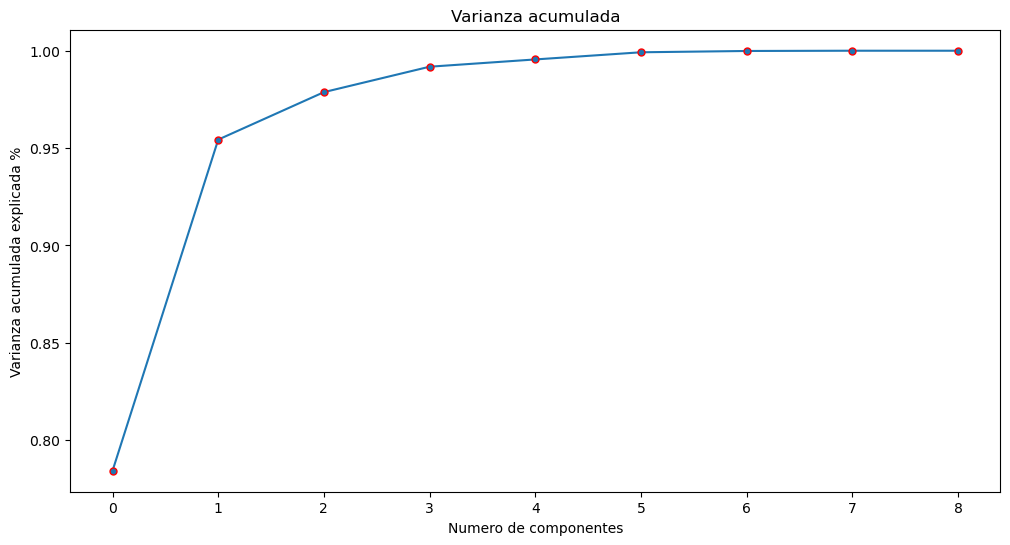

In [359]:
plt.figure(figsize = (12, 6))

plt.plot(np.cumsum(PruebaPCA.explained_variance_ratio_), marker = "o", markersize=5, markeredgecolor='red')

plt.xlabel('Numero de componentes')
plt.ylabel('Varianza acumulada explicada %')
plt.title("Varianza acumulada")

#### Tras realizar un plot de nuestra varianza acumulada, podemos apreciar en el eje Y que nuestro modelo es capas de explicar al rededor de un 95% de esa varianza, dato que utilizaremos para encontrar un nuevo numero optimo de componentes.

In [360]:
new_PCA = PCA(.95)
new_PCA = new_PCA.fit(df_robust_scaler)

new_PCA.n_components_ 

2

#### Efectivamente, luego de pasar como paramentro dentro del metodo PCA un 95%, el numero de componentes se reduce de 9 a 2.

In [361]:
PCA_2 = PCA(n_components = 2)


df_PCA = PCA_2.fit(df_robust_scaler)

df_PCA = pd.DataFrame(df_PCA.transform(df_robust_scaler), columns=["PCA1", "PCA2"], index=df.index)

df_PCA

,PCA1,PCA2
0,48.141927,39.279885
1,-14.873807,-2.241151
2,3.371249,3.438150
3,-14.877890,-2.247779
4,-14.268106,-1.394616
...,...,...
6994,-14.880194,-2.251517
6995,-14.788323,-2.142925
6996,-14.822736,-2.173432
6997,-11.064314,1.577548


#### De esta manera se ha reducido nuestro Df estandarizado con RobustScaler de 9 componentes, a solo 2 componentes principales.

## K-Means

#### El objetivo del algoritmo K means es agrupar los datos segun su similitud generando asi diferentes clusters o grupos.

#### Para comenzar es necesario asignar al algoritmo cuantos clusters queremos formar, como aun no sabemos el numero exacto, se deben realizar pruebas para determinar el numero de clusters optimos en los cuales vamos a dividir nuestros datos.

/Users/Moraes/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Moraes/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Moraes/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Moraes/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Moraes/an

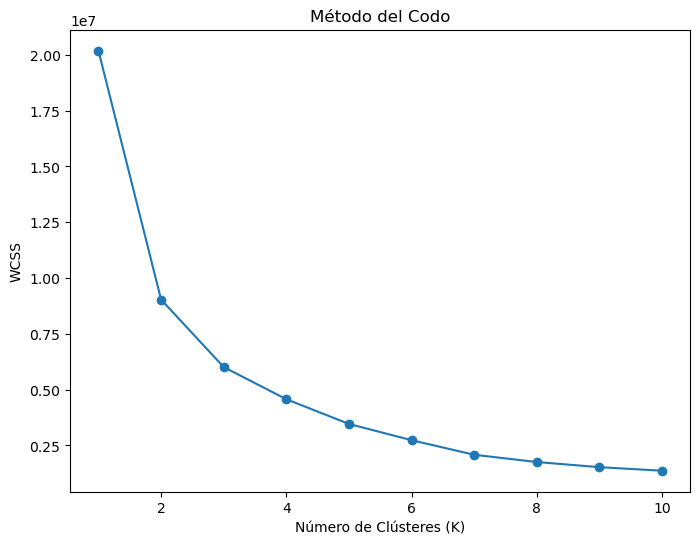

In [362]:
from sklearn.cluster import KMeans

wcss = []  

# Realizamos un bucle de un rango de 1 a 10 para determinar el numero de clusters

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)   # pasamos el parametro k para encontar el numero de clusters
    kmeans.fit(df_PCA) # Entrenamos el modelo con el metodo fit pasando como parametro nuestro Df con su PCA
    wcss.append(kmeans.inertia_) # Append agrega a la lista wcss los valores correspondientes a k asigananle el resultado de inercia.

plt.figure(figsize = (8,6))    
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('WCSS')
plt.show()    

#### Para encontrar el numero optimo de clusters aplicamos el metodo del codo (elbow method), en este metodo se calcula la incercia, la cual mide cuánto se dispersan los puntos dentro de cada cluster. El objetivo principal de K-Means es minimizar esta inercia. Luego de visualizar el grafico podemos ver que la inercia comienza a deternerse entre 2 y 3 en el eje X asignado al numero de clusters que estamos buscando encontrar. Para localizar el numero de clusters de forma mas certera aplicaremos el metodo KneeLocator el cual nos indicara el numero de K exacto.

In [363]:
from kneed import KneeLocator

knee = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')

print("Mejor numero de clusters:", knee.elbow)

Mejor numero de clusters: 3


In [364]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

kmeans = kmeans.fit(df_PCA)

/Users/Moraes/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### Una vez localizado el numero optimo de clusters lo pasamos como paramentro dentro del metodo Kmeans y lo ajustamos a nuestro modelo el cual contiene nuestro Df con su PCA.

In [365]:
cluster_labels = kmeans.predict(df_PCA)
cluster_labels

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

#### Mediante el metodo predict() predecimos a qué clúster pertenece cada punto de datos dentro de nuestro dataframe asiganandolo a su centroide correspondiente.

In [366]:
centroids = kmeans.cluster_centers_
centroids

array([[-11.09640558,  -1.20190561],
       [100.1754256 ,  25.01590237],
       [335.02713119, -56.96723379]])

#### Por ultimo una vez nuestro modelo haya sido ajustado y se le haya asignado las etiquetas a cada dato dentro de nuestro data frame, mediante el metodo cluster_centers_ obtenemos las cordenadas exactas donde se encontraran los centroides de nuestro modelo.

In [382]:
df_final['cluster_labels'] = cluster_labels
df_PCA['cluster_labels'] = cluster_labels
df_PCA

,PCA1,PCA2,cluster_hward,cluster_haverage,cluster_labels
0,48.141927,39.279885,1,0,1
1,-14.873807,-2.241151,1,0,0
2,3.371249,3.438150,1,0,0
3,-14.877890,-2.247779,1,0,0
4,-14.268106,-1.394616,1,0,0
...,...,...,...,...,...
6994,-14.880194,-2.251517,1,0,0
6995,-14.788323,-2.142925,1,0,0
6996,-14.822736,-2.173432,1,0,0
6997,-11.064314,1.577548,1,0,0


In [383]:
df_PCA['cluster_labels'].value_counts()

0    6452
1     475
2      72
Name: cluster_labels, dtype: int64

#### Luego de un conteo para los valores correspondientes a cada cluster vemos que para la primer etiqueta numero 0 hay 6452 registros de datos, para la etiqueta numero 1 hay 475 registros de datos y para la etiqueta numero 2 hay 72.

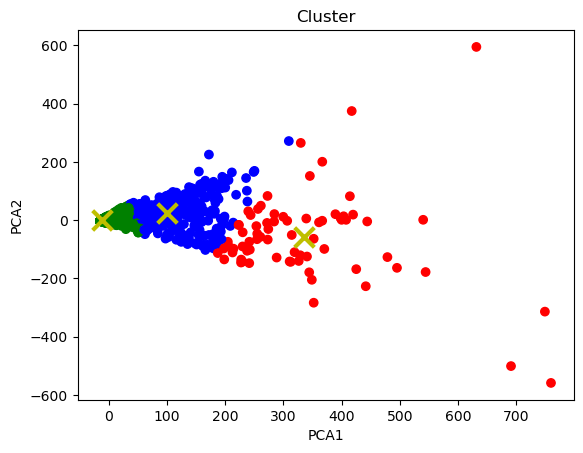

In [384]:
from matplotlib.colors import ListedColormap

cmap_colors = ListedColormap(['green', 'blue', 'red'])

plt.scatter(df_PCA['PCA1'], df_PCA['PCA2'], c=df_PCA['cluster_labels'], cmap=cmap_colors)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='y')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Cluster')
plt.show()

#### Por ultimo graficamos mediante un scatter plot en donde podemos ver como se agrupan los datos y se distribuyen dentro de la grafica, los colore representan cada uno de los clusters y las X dentro del grafico representan los centroides.

## - Exercici 2
### Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

In [385]:
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
import scipy
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

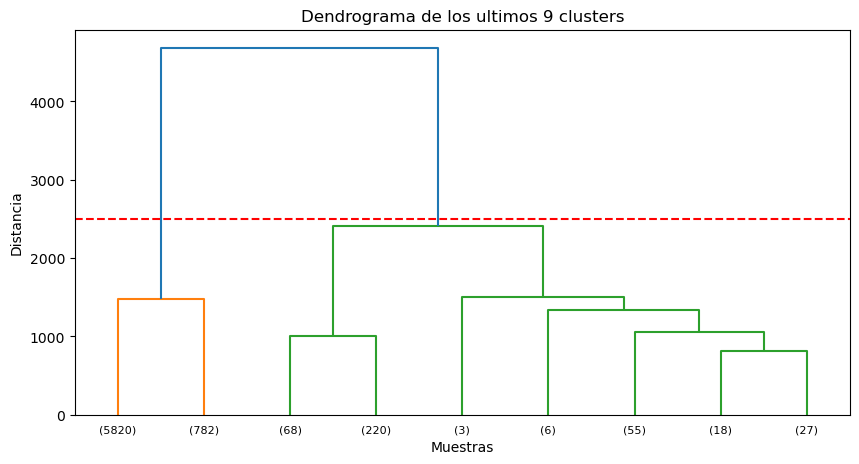

Numero de clusters: 2


In [386]:
Z = linkage(df_PCA.values, method='ward') # Calculo de la matriz de vinculo (linkage) con el metodo ward

p = 9  # Nombre de merged clusters a mostrar

plt.figure(figsize=(10, 5))

dendrogram(Z,leaf_font_size=8,truncate_mode='lastp', p=p)# Z = matriz de linkage ,  metodo 'last_p' = a mostrar los ultimos clusters fusionados, 9 el numero de fusiones a mostrar

# determianmos el valor de corte 
max_d = 2500  # Valor de corte
clusters = fcluster(Z, max_d, criterion='distance') # f cluster para determinar el corte deseado
plt.axhline(y=max_d, color='r', linestyle='--')  # linea horizontal del punto de corte 
plt.title('Dendrograma de los ultimos 9 clusters')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

# numero de clusters luego de establecer el punto de corte 
num_clusters = len(set(clusters))
print("Numero de clusters:", num_clusters)

#### Luego de aplicar el Dendrograma para los ultimos 9 clusters y graficarlo podemos ver como debajo de la linea punteada de color rojo se ubican los clusters con los que nos quedaremos para realizar nuestra actividad, cabe destacar que el numero de clusters en observación es aleatorio y depende de la interpretacion de cada dendograma yo en mi caso he elegido 9.

In [372]:
k = 2 # nro de clusters

modelo = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward') # nro de clusters, metrica de distancia "euclidean" y metodo "ward"
modelo.fit(df_PCA) # ajuste del modelo

Hclustering_ward = modelo.labels_ # obtención de labels
Hclustering_ward

/Users/Moraes/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1])

In [373]:
df_final['cluster_hward'] = Hclustering_ward
df_PCA['cluster_hward'] = Hclustering_ward
df_PCA

,PCA1,PCA2,cluster_hward
0,48.141927,39.279885,1
1,-14.873807,-2.241151,1
2,3.371249,3.438150,1
3,-14.877890,-2.247779,1
4,-14.268106,-1.394616,1
...,...,...,...
6994,-14.880194,-2.251517,1
6995,-14.788323,-2.142925,1
6996,-14.822736,-2.173432,1
6997,-11.064314,1.577548,1


In [374]:
df_PCA['cluster_hward'].value_counts()

1    6602
0     397
Name: cluster_hward, dtype: int64

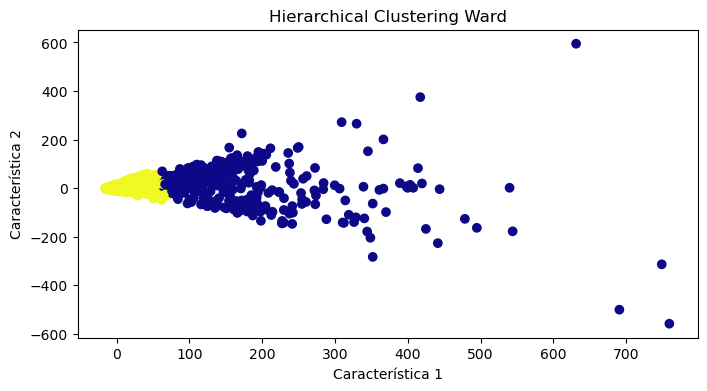

In [375]:
plt.figure(figsize=(8, 4))
plt.scatter(df_PCA['PCA1'], df_PCA['PCA2'], c=df_PCA['cluster_hward'], cmap='plasma')
plt.title('Hierarchical Clustering Ward')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

plt.show()

#### La variable Hclustering_ward contendrá las etiquetas de cluster asignadas a cada punto en el conjunto de datos df_PCA después de aplicar el clustering jerárquico aglomerativo con dos clusters, luego de asignarlo a una columna dentro del dataframe llevamos a cabo la representacion grafica mediante scatter plot con sus correspondientes clusters

In [376]:
k = 2

modelo2 = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
modelo2.fit(df_PCA)

Hclustering_average =modelo2.labels_
Hclustering_average

/Users/Moraes/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [377]:
df_final['cluster_haverage'] = Hclustering_average
df_PCA['cluster_haverage'] = Hclustering_average
df_PCA

,PCA1,PCA2,cluster_hward,cluster_haverage
0,48.141927,39.279885,1,0
1,-14.873807,-2.241151,1,0
2,3.371249,3.438150,1,0
3,-14.877890,-2.247779,1,0
4,-14.268106,-1.394616,1,0
...,...,...,...,...
6994,-14.880194,-2.251517,1,0
6995,-14.788323,-2.142925,1,0
6996,-14.822736,-2.173432,1,0
6997,-11.064314,1.577548,1,0


In [378]:
df_PCA['cluster_haverage'].value_counts()

0    6996
1       3
Name: cluster_haverage, dtype: int64

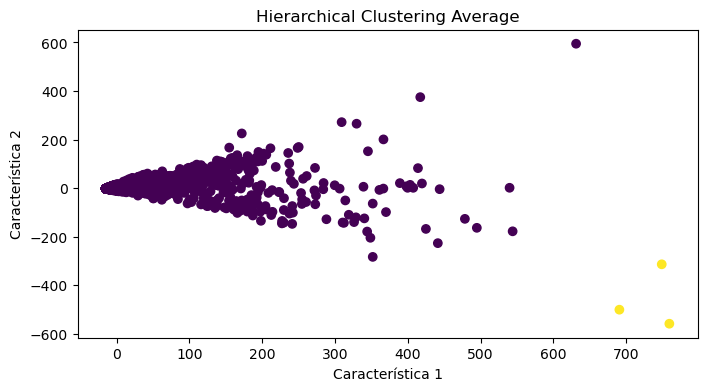

In [379]:
plt.figure(figsize=(8, 4))
plt.scatter(df_PCA['PCA1'], df_PCA['PCA2'], c=df_PCA['cluster_haverage'], cmap='viridis')
plt.title('Hierarchical Clustering Average')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

plt.show()

#### Luego de realizar las prubas con dos metodos diferentes, podemos ver las diferentes distribuciones que ofrece cada clusterizacion segun se utilice el metodo Ward o Average.

## - Exercici 3
### Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [380]:
from sklearn.metrics import silhouette_score

# Calculem el rendiment amb silhouette scores per cada algoritme

kmeans_silhouette = silhouette_score(df_PCA, cluster_labels)
ward_silhouette = silhouette_score(df_PCA, Hclustering_ward)
average_silhouette = silhouette_score(df_PCA, Hclustering_average)

print("Rendiment Kmeans: {:.2f}%".format(kmeans_silhouette * 100))
print("Rendiment Ward: {:.2f}%".format(ward_silhouette * 100))
print("Rendiment Average: {:.2f}%".format(average_silhouette * 100))

Rendiment Kmeans: 87.65%
Rendiment Ward: 89.32%
Rendiment Average: 96.40%


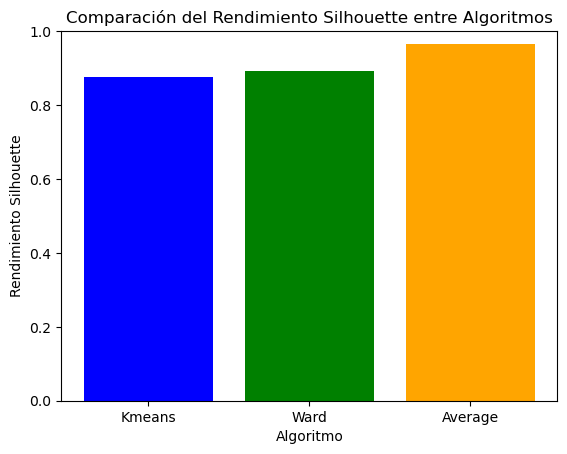

In [381]:
algoritmos = ['Kmeans', 'Ward', 'Average']

silhouette_scores = [kmeans_silhouette, ward_silhouette, average_silhouette]

plt.bar(algoritmos, silhouette_scores, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)

plt.xlabel('Algoritmo')
plt.ylabel('Rendimiento Silhouette')
plt.title('Comparación del Rendimiento Silhouette entre Algoritmos')

plt.show()

#### Luego de comparar los rendimientos de los 3 modelos mediante silhoutte, podemos ver que el metodo Average tiene un mayor rendimiento con un 96,4 % frente a un 89,32 % del motodo Ward y 87,65% del Kmeans.  Estos porcetajes indican cuan separados estan los puntos entre si dentro de los clusters, toda medida que se acerque a 1 o al 100% en este caso indica un mejor rendimiento del modelo.